# Author Idenfication

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [2]:
csv_path = "../data.csv"
books_path = "../books1/epubtxt"

## Exploration

In [44]:
df = pd.read_csv(csv_path,index_col=0)

In [8]:
df

,title,author,publish,genres,Text
0,Silence,Natasha Preston,"Oct. 19, 2012","['Fiction', 'Romance', 'NewadultFiction', 'Rom...",\n\n**Silence** \nBy Natasha Preston \nSmash...
1,How to Be Free,Joe Blow,"Sep. 13, 2011","['Nonfiction', 'Psychology', 'TheoryNonfiction...",\n\nHow can we free ourselves from mental suff...
2,"The Pirate, Part I: The Traitor",Malcolm Torres,"March 18, 2017","['Fiction', 'Adventure', 'SeaadventuresFiction...",\n\n### THE PIRATE\n\n### Part I: The Traitor\...
3,The New Girl,Tracie Puckett,"Jan. 2, 2012","['Fiction', 'Youngadultorteen', 'RomanceFictio...","The New Girl\n\nWebster Grove, Book 1\n\nTraci..."
4,Sharp Shooter,Marianne Delacourt,"May 25, 2016","['Fiction', 'Mystery&detective', 'WomenSleuths...","\n# Sharp Shooter\n\n### Tara Sharp, Book 1\n..."
...,...,...,...,...,...
12336,Hawk Banks - Founding Texas,D. Allen Henry,"June 16, 2014","['Fiction', 'Historical', 'USAFiction', 'Adven...",\n\n### Hawk Banks\n\n### Founding Texas\n\n##...
12337,The Expats,Ivy D'Souza,"March 1, 2013","['Fiction', 'Cultural&ethnicthemes', 'Cultural...",\n### The Expats\n\nIvy D'Souza\n\nAll rights...
12338,The Fire of Heaven,Robert Jones,"Sep. 21, 2012","['Nonfiction', 'Religion&Spirituality', 'Chris...",\n### THE FIRE OF HEAVEN\n\nBy\n\nRev. Robert...
12339,Dead Ringer,William Cone,"Aug. 14, 2015","['Fiction', 'Thriller&suspense', 'Action&suspe...",\n\n### DEAD RINGER\n\nA Novel\n\nby\n\nWILLIA...


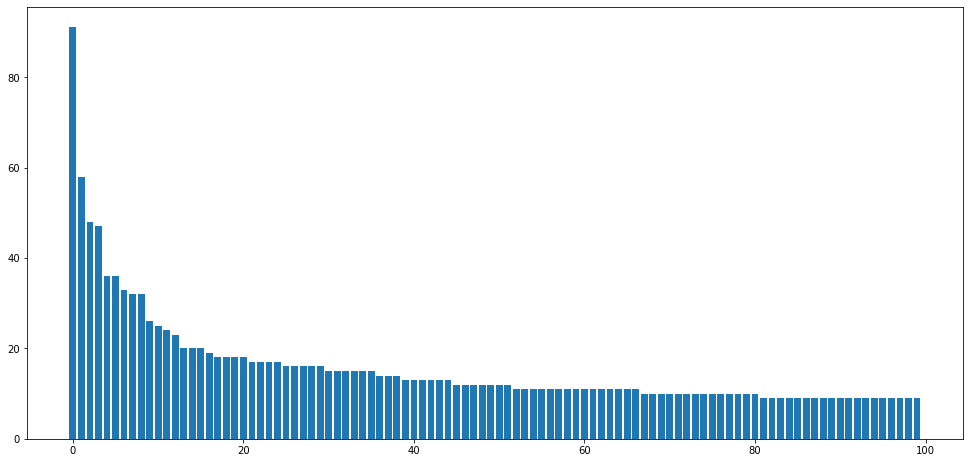

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(list([i for i in range(0,100)]), list(df.groupby("author").count().nlargest(100,"Text")["Text"]))
plt.show()

In [49]:
# df["genres"] = df["genres"].apply(lambda s : set(s.replace("[","").replace("]","").replace("'","").split(",")))
df["genres"] = df["genres"].apply(lambda s : set(s))
df2 = df.explode("genres")

In [59]:
df2[df2["genres"].str.contains("Islam")].groupby("author").count()["genres"].sort_values(ascending=False)

author
Harun Yahya                         89
Harun Yahya (Adnan Oktar)           68
Osman Nuri Topbas                   20
Mohammad Amin Sheikho               18
Faisal Fahim                        17
Hüseyn Hilmi Işık                   16
Adnan Oktar (Harun Yahya)           10
Harun Yahya - Adnan Oktar            6
Syed Jazib Reza Kazmi                5
Talal Itani                          4
M. Sıddık Gümüş                      3
Meinhaj Hussain                      3
Nassim Benamra                       3
Javed Jamil                          2
Farid Camus                          2
Hatem Yahia                          2
Mirza Yawar Baig                     2
Muhammad Sulaiman                    2
Murat Kaya                           2
Mirza Tahir Ahmad                    2
P. Zainul Abideen                    2
Peace Vision                         2
Muhammed Hâdimî                      1
Mirza Masroor Ahmad                  1
Mohammed Irfanullah                  1
Musa Topbas       

In [34]:
df.groupby(["genres","author"]).count()["title"].sort_values(ascending=False)

genres                                                                   author                   
['Nonfiction', 'Religion&Spirituality', 'Education']                     Jesus (AJ Miller)            45
['Nonfiction', 'Religion&Spirituality', 'Islam', 'Prayerbooks/Islamic']  Harun Yahya                  33
                                                                         Harun Yahya (Adnan Oktar)    25
['Nonfiction', 'Education&StudyGuides', 'Studyguides-Literature']        David Bruce                  20
['Nonfiction', 'Religion&Spirituality', 'Islam', 'Prayerbooks']          Harun Yahya                  19
                                                                                                      ..
['Fiction', 'Literature', 'Plays&Screenplays']                           Esther Minskoff               1
                                                                         JoAnne Soper-Cook             1
                                                             

In [61]:
specfic_authors = ["Osman Nuri Topbas","Mohammad Amin Sheikho"]
new_df = df2[df2["author"].isin(specfic_authors)]
new_df.groupby(["author","genres"]).count()

title  publish  \
author                genres                                                  
Mohammad Amin Sheikho  Adventurers&explorers                     1        1   
                       Biography                                 1        1   
                       Food-contentguides                        1        1   
                       Health                                    1        1   
                       Islam                                     1        1   
                       Islam/History                             2        2   
                       Islam/Koran&SacredWritings                2        2   
                       Islam/Koran&SacredWritingsNonfiction      8        8   
                       Islam/Rituals&Practice                    2        2   
                       Islam/Rituals&PracticeNonfiction          3        3   
                       Philosophy                                3        3   
                       Prayerbooks                               1        1   
                       Religion&Spirituality                    11       11   
                       ReligiousbiographyNonfiction              1        1   
                       Religiousphilosophy                       3        3   
                      &medicine                                  1        1   
                      Nonfiction                                12       12   
                      wellbeing                                  1        1   
Osman Nuri Topbas      Islam                                    16       16   
                       Islam/Sufi                                2        2   
                       Islam/Theology                            2        2   
                       Religion&Spirituality                    20       20   
                      Nonfiction                                20       20   

                                                             Text  
author                genres                                       
Mohammad Amin Sheikho  Adventurers&explorers                    1  
                       Biography                                1  
                       Food-contentguides                       1  
                       Health                                   1  
                       Islam                                    1  
                       Islam/History                            2  
                       Islam/Koran&SacredWritings               2  
                       Islam/Koran&SacredWritingsNonfiction     8  
                       Islam/Rituals&Practice                   2  
                       Islam/Rituals&PracticeNonfiction         3  
                       Philosophy                               3  
                       Prayerbooks                              1  
                       Religion&Spirituality                   11  
                       ReligiousbiographyNonfiction             1  
                       Religiousphilosophy                      3  
                      &medicine                                 1  
                      Nonfiction                               12  
                      wellbeing                                 1  
Osman Nuri Topbas      Islam                                   16  
                       Islam/Sufi                               2  
                       Islam/Theology                           2  
                       Religion&Spirituality                   20  
                      Nonfiction                               20

In [22]:
df[(df["genres"].str.contains("Education")) & (df["author"]=="David Bruce")]["author"].value_counts()

David Bruce    21
Name: author, dtype: int64

In [11]:
counts = df["Text"].swifter.apply(lambda s : len(s.split(" "))//500)
counts.describe()

Pandas Apply:   0%|          | 0/12341 [00:00<?, ?it/s]

count    12341.000000
mean       126.519731
std        118.946878
min          0.000000
25%         62.000000
50%        105.000000
75%        161.000000
max       7690.000000
Name: Text, dtype: float64

In [32]:
len(list(a[a>=5].index))

300

In [29]:
a = df["author"].value_counts()
df[df["author"].isin(list(a[a>=15].index))]

,title,author,publish,genres,Text,counts
40,Witch's Bell Book One,Odette C. Bell,"Jan. 30, 2012","['Fiction', 'Fantasy', 'Contemporary']",\n\nAll characters in this publication are fic...,194
324,A Plain Jane Book One,Odette C. Bell,"Oct. 10, 2012","['Fiction', 'Sciencefiction', 'SpaceoperaFicti...",\n# Table of Contents\n\nA Plain Jane Book One...,136
458,The Betwixt Book One,Odette C. Bell,"Jan. 30, 2012","['Fiction', 'Sciencefiction', 'Adventure']",\nAll characters in this publication are fict...,160
583,The Truth about Syria,Barry Rubin,"Feb. 15, 2013","['Essay', 'PoliticalNonfiction', 'Politics&Cur...",\n# The Truth about Syria\n\nBy Barry Rubin\n...,248
631,Seâdet-i Ebediyye Endless Bliss First Fascicle,Hüseyn Hilmi Işık,"Dec. 2, 2011","['Nonfiction', 'Religion&Spirituality', 'Islam']",\nSeâdet-i Ebediyye Endless Bliss First Fasci...,238
...,...,...,...,...,...,...
12095,"The Quartet, Jace",Ipam,"June 3, 2014","['Fiction', 'Mystery&detective', 'General']",\nThe Quartet\n\nJace\n\nipam\n\nSmashwords E...,1051
12119,"The Quartet, Jane",Ipam,"April 14, 2014","['Fiction', 'Adventure', 'Men’sadventure']",\nThe Quartet\n\nJane\n\nipam\n\nSmashwords E...,1104
12165,"The Quartet, Babe",Ipam,"July 11, 2012","['Fiction', 'Thriller&suspense', 'Psychologica...",\nThe Quartet\n\nBabe\n\nipam\n\nSmashwords E...,1126
12215,Aim High,Ipam,"Dec. 5, 2016","['Fiction', 'Youngadultorteen', 'Adventure']",\n\n### Aim High\n\n### ipam\n\nSmashwords Edi...,537


In [ ]:
df["counts"] = counts

(0.0, 40.0)

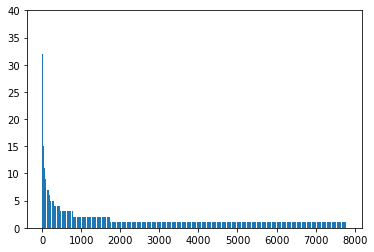

In [6]:
authors_count = df["author"].value_counts()
plt.bar(list(range(authors_count.size)),authors_count.values)
ax = plt.gca()
ax.set_ylim([0, 40])
# plt.bar(authors_count.index,authors_count.values)

In [9]:
df["author"].value_counts()

Harun Yahya                  91
Harun Yahya (Adnan Oktar)    58
Rod Island                   48
Jesus (AJ Miller)            47
Faisal Fahim                 36
                             ..
Tommy Strelka                 1
J.L. Berg                     1
Anthony E Thorogood           1
Fernando Davalos              1
Jeffrey Rubin                 1
Name: author, Length: 7792, dtype: int64

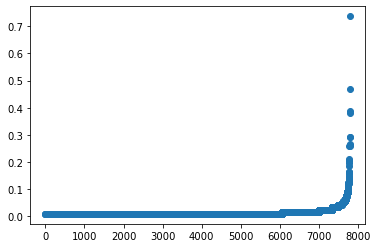

In [8]:
plt.scatter(list(range(s.values.size)),s.values)

In [22]:
import swifter
count_lines = df["Text"].swifter.apply(lambda s : s.replace("\n\n"," ").replace("  "," ").count(' '))

Pandas Apply:   0%|          | 0/12341 [00:00<?, ?it/s]

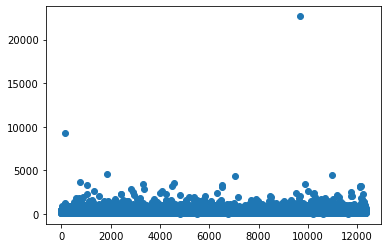

In [24]:
plt.scatter(list(range(count_lines.values.size)),count_lines.values/(9*20))
plt.ylim(0,)

In [ ]:
(count_lines*200).describe()

## Models

### Xgboost

### LSTM

### NN with Word2Vec

### Using PCA